      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

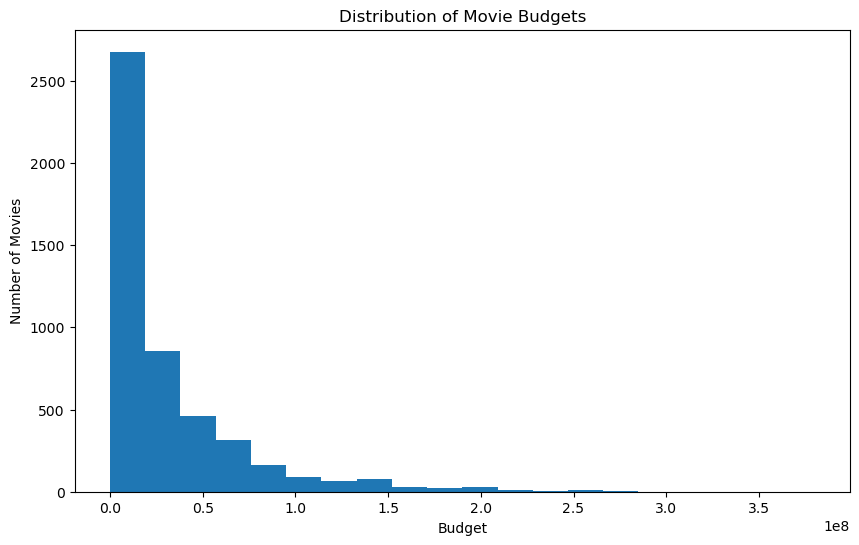

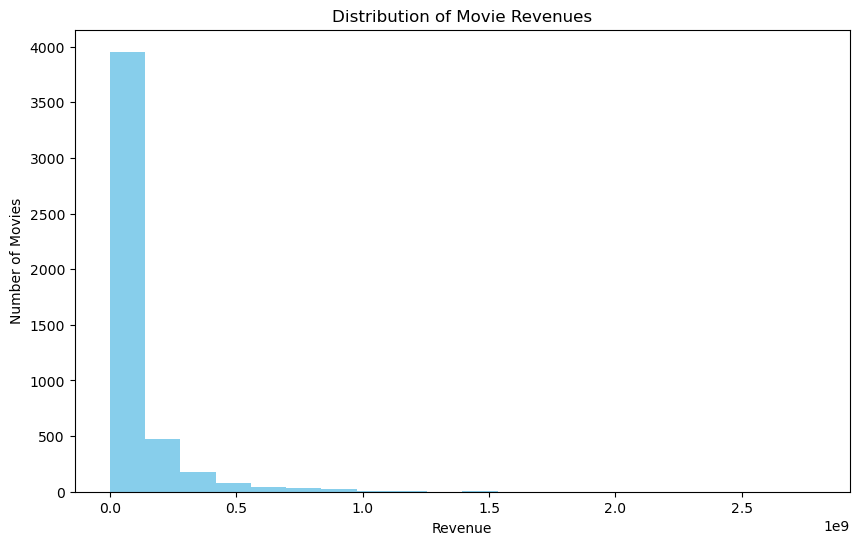

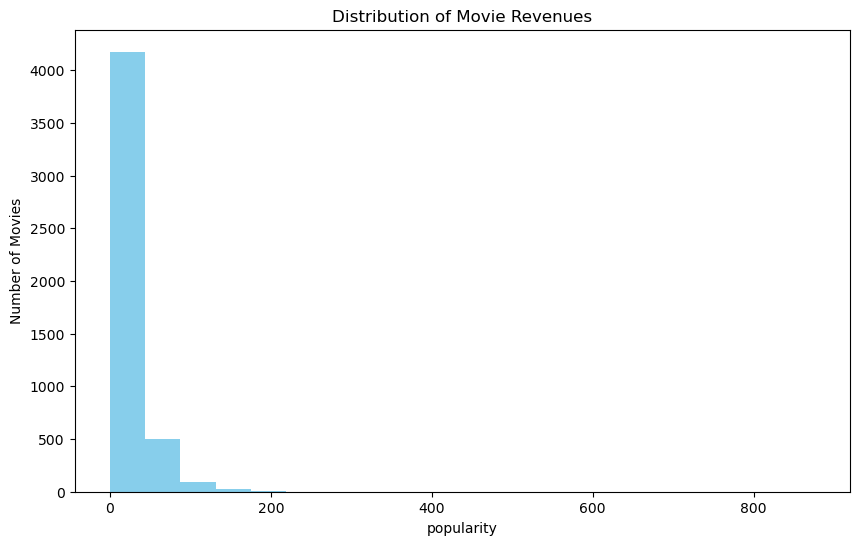

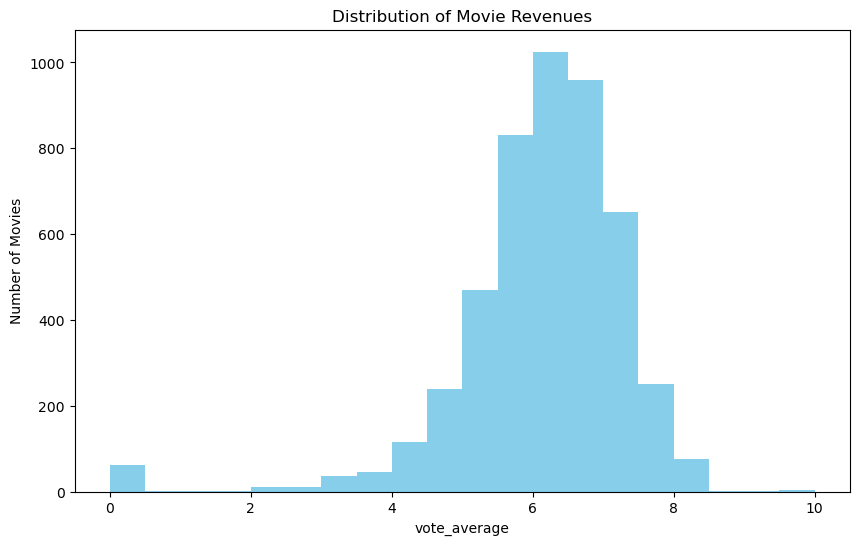

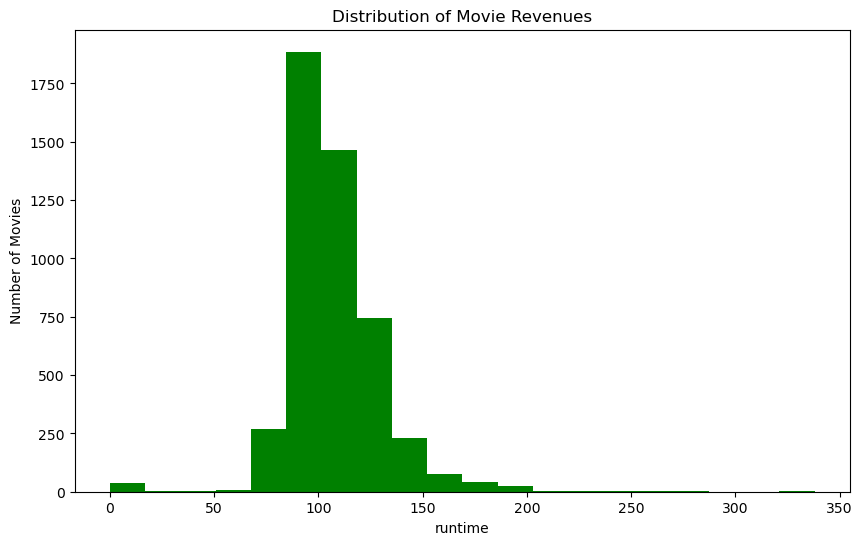

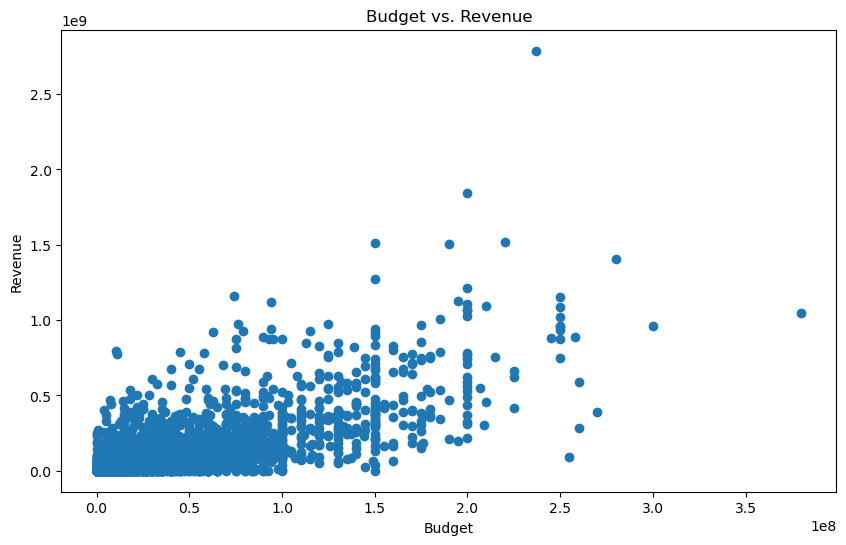

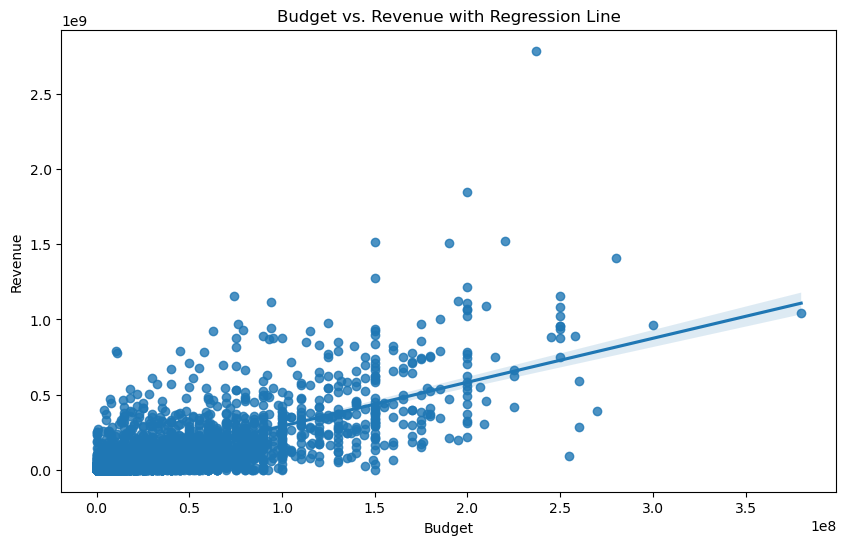

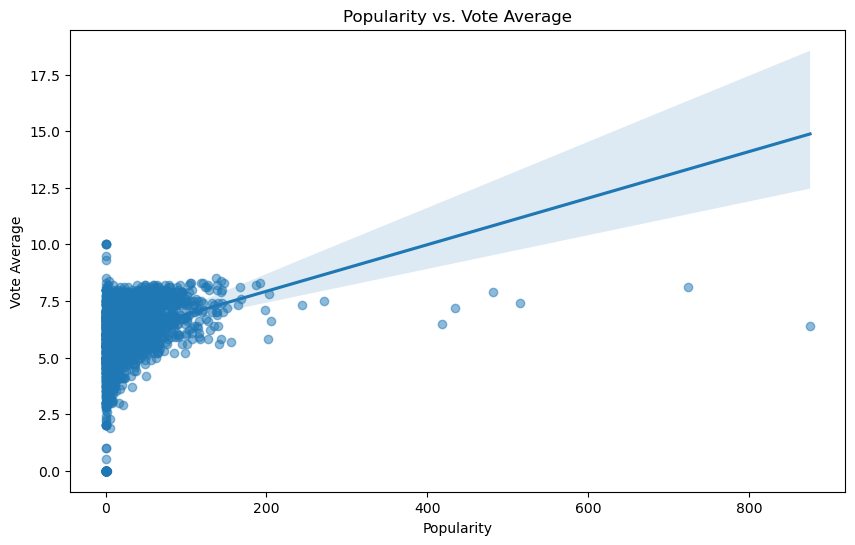

0
                budget        id  popularity   revenue   runtime  \
budget        1.000000 -0.089377    0.505414  0.730823  0.269624   
id           -0.089377  1.000000    0.031202 -0.050425 -0.160211   
popularity    0.505414  0.031202    1.000000  0.644724  0.225739   
revenue       0.730823 -0.050425    0.644724  1.000000  0.250910   
runtime       0.269624 -0.160211    0.225739  0.250910  1.000000   
vote_average  0.093146 -0.270595    0.273952  0.197150  0.376267   
vote_count    0.593180 -0.004128    0.778130  0.781487  0.271757   

              vote_average  vote_count  
budget            0.093146    0.593180  
id               -0.270595   -0.004128  
popularity        0.273952    0.778130  
revenue           0.197150    0.781487  
runtime           0.376267    0.271757  
vote_average      1.000000    0.312997  
vote_count        0.312997    1.000000  


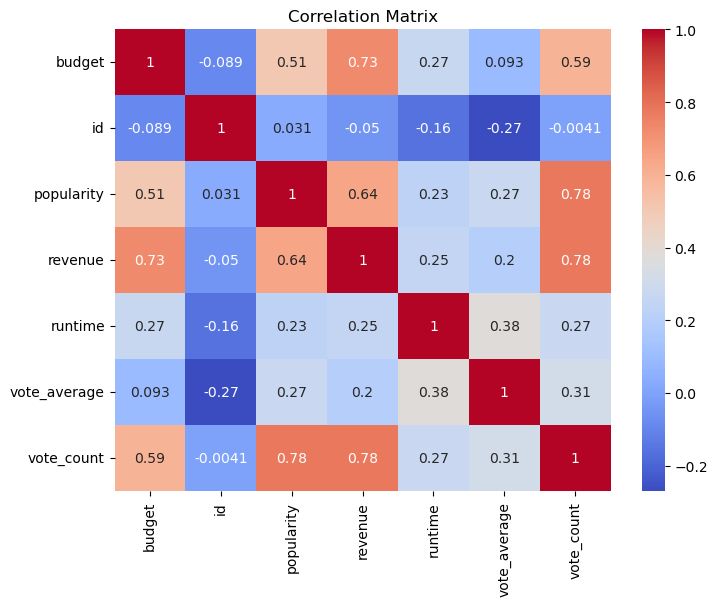

genres
[{"id": 18, "name": "Drama"}]                                                                     5091.125530
[{"id": 35, "name": "Comedy"}]                                                                    4758.276471
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                   2318.678764
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                  1986.942157
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    1736.331206
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                       1616.412028
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]     1445.299567
[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]    1258.681803
[{"id": 27, "name": "Horror"}]                                                                    1118.064508
[{"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load and Inspect
df = pd.read_csv("/Users/softtouchcomputers/PycharmProjects/TMDB 5000 Movie Dataset/tmdb_5000_movies.csv")
print(df.head())
print(df.info())
print(df.isnull().sum)

#Filling the empty cells in homepage with 'no homepage provided'
df.fillna({'homepage': 'No Homepage Provided'}, inplace= True)

#Filling the empty cells in overview with 'no overview provided'
df.fillna({'overview': 'No overview Provided'}, inplace= True)

#Filling the empty cell in release_date with 'Unknown'
df.fillna({'release_date': 'Unknown'}, inplace= True)

#Filling the empty cells in runtime with 0
df.fillna({'runtime': 0}, inplace= True)
print(df['runtime'].isnull().sum())

#Filling the empty cells in tagline with Unknown
df.fillna({'tagline': 'Unknown'}, inplace= True)
print(df['tagline'].isnull().sum())

#Checking all columns again for blank cells
print(df.isnull().sum)

#Checking to see the data type of the column release_date
print(df['release_date'].dtype)

#Convert 'release_date' to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].dtype)
print(df['release_date'].isnull().sum())

#Descriptive Statistics to ptovode mean,count,min,max,std,quartile
print(df.describe())


#Using Histogram Visualization to analyze Budget of movies
#This helps to know how many movies are low budget or high budget movies
plt.figure(figsize=(10, 6))
plt.hist(df['budget'], bins=20)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Number of Movies')
plt.show()

#Histogram for  Revenue
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=20, color='skyblue')  # Example with different color
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.show()

#Histogram for  popularity
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20, color='skyblue')  # Example with different color
plt.title('Distribution of Movie Revenues')
plt.xlabel('popularity')
plt.ylabel('Number of Movies')
plt.show()

#Histogram for  vote_average
plt.figure(figsize=(10, 6))
plt.hist(df['vote_average'], bins=20, color='skyblue')  # Example with different color
plt.title('Distribution of Movie Revenues')
plt.xlabel('vote_average')
plt.ylabel('Number of Movies')
plt.show()

#Histogram for  runtime
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=20, color='green')  # Example with different color
plt.title('Distribution of Movie Revenues')
plt.xlabel('runtime')
plt.ylabel('Number of Movies')
plt.show()

#Scatter plot of budget vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'])
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


#scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=df)
plt.title('Budget vs. Revenue with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

#'popularity' vs. 'vote_average')
plt.figure(figsize=(10, 6))
sns.regplot(x='popularity', y='vote_average', data=df, scatter_kws={'alpha':0.5}) #Seaborn with regression line
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

print(df['budget'].isnull().sum())

#Assigning all dashes in budget column as -1
df.fillna({'budget': -1},inplace=True)

#correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Grouped Analysis (Aggregate statistics by category)
#Top 10 most popular genres
top_genres = df.groupby('genres')['popularity'].sum().nlargest(10)
print(top_genres)

#Average vote average by genre
genre_ratings = df.groupby('genres')['vote_average'].mean()
print(genre_ratings)



# Movie Industry Analysis with TMDB 5000 Dataset

## 1. Introduction

This notebook explores trends and patterns in the movie industry using the TMDB 5000 Movie Dataset.  We will analyze relationships between budget, revenue, popularity, vote average, and genres to gain insights into factors influencing movie success.

## 2. Data Loading and Inspection

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("/Users/softtouchcomputers/PycharmProjects/TMDB 5000 Movie Dataset/tmdb_5000_movies.csv")

# Display the first few rows
print(df.head())

# Get information about the dataset (data types, missing values)
print(df.info())

# Check for missing values (more detailed than info())
print(df.isnull().sum())


# We begin by importing the necessary libraries (pandas, matplotlib, seaborn, and numpy) and loading the dataset. We then inspect the first few rows and get information about the data types and missing values to understand the data we are working with.

# Fill missing values in specified columns with placeholder text
for col in ['homepage', 'overview', 'tagline']:
    df[col] = df[col].fillna(f"No {col.capitalize()} Provided")

# Convert 'release_date' to datetime objects, handling errors
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].fillna('Unknown')

# Fill missing 'runtime' values with 0
df['runtime'] = df['runtime'].fillna(0)

# Clean and convert 'budget' to numeric, handling missing values
df['budget'] = df['budget'].astype(str).str.replace(r'[$,]', '', regex=True)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].fillna(-1)  # -1 represents "Undisclosed"

# Clean 'genres' column: Convert to lists of genre names
df['genres'] = df['genres'].apply(eval)
df['genres'] = df['genres'].apply(lambda x: [d['name'] for d in x])
df_exploded = df.explode('genres')

# Verify that missing values have been handled
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Grouped analysis by genre (using the exploded DataFrame)
top_genres = df_exploded.groupby('genres')['popularity'].sum().nlargest(10)
print("\nTop 10 Most Popular Genres:\n", top_genres)

genre_ratings = df_exploded.groupby('genres')['vote_average'].mean()
print("\nAverage Vote Average by Genre:\n", genre_ratings)



FIGSIZE = (12, 6)  # Define a constant for figure size

# Histograms
for col in ['budget', 'revenue', 'popularity', 'vote_average', 'runtime']:
    plt.figure(figsize=FIGSIZE)
    plt.hist(df[col], bins=20, color='skyblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Number of Movies')
    plt.show()

# Scatter plots
plt.figure(figsize=FIGSIZE)
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=FIGSIZE)
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'alpha': 0.5})
plt.title('Budget vs. Revenue with Regression Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=FIGSIZE)
sns.regplot(x='popularity', y='vote_average', data=df, scatter_kws={'alpha': 0.5})
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()


 Key Findings and Insights

Budget vs. Revenue: We observed a strong positive correlation between budget and revenue (correlation coefficient: 0.73). This indicates that higher-budget movies tend to generate higher revenues. However, there are outliers… (continue with your analysis).
Genre Trends: Drama and Comedy were the most popular genres…

In [ ]:
Conclusion and Future Work

This project provided valuable insights into the movie industry. 
Future work could explore the impact of directors, actors, production companies, or marketing campaigns. 
Sentiment analysis of movie reviews could also be insightful.